<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/Simple_harmonic_motion_in_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least squares fitting

One way to analyze this system is by obtaining a function that fits the data. We know that simple harmonic motion has a sinusoidal profile so we will try to fit the best fit sinusoidal function. This is not as simple as using the np.polyfit but this will give you an idea of what goes behind the scenes of np.polyfit

We plot our ultrasound data again as a start. We'll use the[ example data](https://drive.google.com/open?id=1mRAl6J92CvmfPjvzcUuCasVbSuXsWL5i) from the pre-lab, but you will be expected to do this procedure on your own data for the lab report.

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
# numpy has a function that helps to read data files so we import it
import numpy as np
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ',' since it is a csv file.
# We used skiprows = 1 to skip the first row of the csv file which contained the column headers and the units. 
# Your data should have five columns - elapsed time, acceleration in x direction, acceleration in y direction, acceleration in z direction, ultrasound distance
read_in_array = np.loadtxt('/content/drive/MyDrive/testOscillation1.csv',skiprows=1,delimiter=',')

In [4]:
# This dataset has five columns
# Take all of the elements in the 0th column to create your x-axis array
x_axis = read_in_array[:,0]
# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (x_axis-x_axis[0])/1000.

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array[:,1]

# The units are cm/s^2, we are converting it to m/s^2.
# The data is collected from a vertical spring mass system.
# We add 9.8 to the array to centre the acceleration around 0 since the smaller mass in the accelerometer always experiences -g. 
acc_data = (acc_data_unrefined/100.)+9.8

# We create an array to store the ultrasound sensor data - this value is in mm, so we convert the unit to m.
ultrasound_unrefined = read_in_array[:,4]
ultrasound = ultrasound_unrefined/1000.

Text(0.5, 0, 'Time (s)')

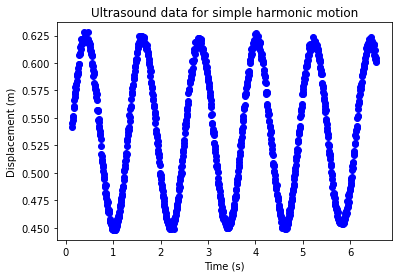

In [5]:
start_time = 20

# Starting the array from the 20th element instead of 0
ultrasound_window = ultrasound[start_time:1000]
elapsed_time_window = elapsed_time[start_time:1000]

# Create a scatter plot
plt.scatter(elapsed_time_window,ultrasound_window,color="blue")

# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Displacement (m)')

# Label the x-axis
plt.xlabel('Time (s)')

The first thing we will do is try to approximately guess from the plot, the critical values to a sine function. These are the amplitude of osciallation, the frequency, the offset and the phase. We will rely on scipy.optimize module's least_squares function. 

In [6]:
from scipy.optimize import least_squares

# Make reasonable guesses for parameters like amplitude, omega, offset and phi based on the plot above 
guess_amplitude = 0.1 
guess_omega = 5
guess_offset = 0.55
guess_phi = 0

# Store all the guessed parameters in an array
guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

We define a function that can generate a sine wave based on the four parameters in consideration. Remember that functions take in inputs and return a result.

In [7]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

We define another function called get_residuals. The purpose of this function is to take in the following inputs - the original data and the parameters for the guessed function. This function will then provide us with residuals or the differences between the observed and predicted values.

In [8]:
def get_residuals(parameters, data, x):
  residuals = np.abs(data - sin_fit_fun(parameters, x))
  return -residuals

Plot the guessed function with initial guesses vs the original data.

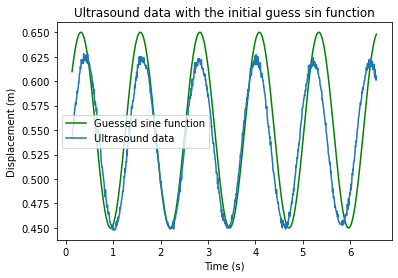

In [9]:
# Create a sin function based on original guess parameters
theoretical_guess_function = sin_fit_fun(guess_parameters, elapsed_time_window)

# Plot the guess function
plt.plot(elapsed_time_window, theoretical_guess_function,color="green",label="Guessed sine function")

# Plot the original data
plt.plot(elapsed_time_window, ultrasound_window, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess sin function")
plt.legend()

Now we will use the least squares function to minimize the residuals obtained. This will ensure that out best fit function is very close to the original data.

In [10]:
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, 
args=(ultrasound_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters = res_lsq['x']

In [11]:
res_lsq = least_squares(get_residuals, guess_parameters, 
                        args=(ultrasound_window,elapsed_time_window))

best_parameters = res_lsq['x']

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

Best Amplitude: 0.08534514412738414
Best Omega: 5.223399414153791
Best offset: 0.5362215105739305
Best Phi: -0.5705371665105196


We will now plot the best fit sin function based on the parameters obtained using the least squares function.

Best Amplitude: 0.08534514412738414
Best Omega: 5.223399414153791
Best offset: 0.5362215105739305
Best Phi: -0.5705371665105196


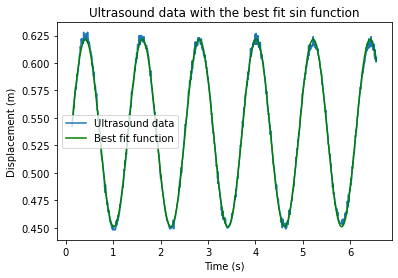

In [12]:
# The best fit sin function will have the best_parameters as an input to the sin function that we created
fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)

# Plot the original data and the best fit function on the same plot
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")
plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Ultrasound data with the best fit sin function")

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

We now have the best fit function to our data. Remember that this works only for a small portion of our data. Our data shows damping in the long run. However, in a smaller time frame, we can use this best fit function to verify if our accelerometer readings agree with us. The function that we obtained finds the position x at any time t. This function x(t) can be differentiated once to get velocity and differentiated again to get acceleration. 

In [13]:
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = best_parameters[0]*best_parameters[1]*np.cos(best_parameters[1]*elapsed_time_window+best_parameters[3])

# acc_fit is the acceleration as a function of time
acc_fit = -best_parameters[0]*(best_parameters[1]**2)*np.sin(best_parameters[1]*elapsed_time_window+best_parameters[3])

[Optional] Plot the acceleration plot from the best fit sin function and compare it with the accelerometer data. What are the differences that you obtain? 

In [ ]:
# Create a scatter plot - elapsed time VS accelerometer data

# Create a plot - elapsed time VS acceleration obtained from best fit positions data

# Provide a title to the plot

# Label the x axis

# Label the y axis

# Proivde legends

# Your analysis

Plot and fit your own data below 

In [17]:
# Read in your time and position data
read_in_array = np.loadtxt('/content/drive/MyDrive/PHYSICS4AL/Unit 3 - Oscillations/3A/cycles.txt',skiprows=1, delimiter=',')




Below are the functions you need for the fit

In [18]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

Plot your time vs position data

Text(0.5, 1.0, 'Acceleration vs Time')

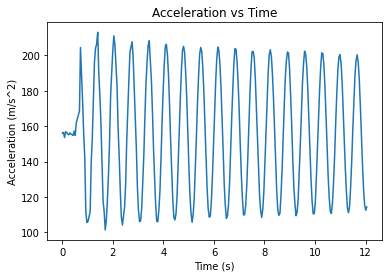

In [56]:
# Make a plot

# This dataset has five columns
# Take all of the elements in the 0th column to create your x-axis array
x_axis = read_in_array[:,0]
# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (x_axis-x_axis[0])

elapsed_time = elapsed_time - elapsed_time[0]
elapsed_time = elapsed_time/1000


# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array[:,2]+9.8

# The units are cm/s^2, we are converting it to m/s^2.
# The data is collected from a vertical spring mass system.
# We add 9.8 to the array to centre the acceleration around 0 since the smaller mass in the accelerometer always experiences -g. 
acc_data = (acc_data_unrefined/100.)

# We create an array to store the ultrasound sensor data - this value is in mm, so we convert the unit to m.
ultrasound_unrefined = read_in_array[:,4]
ultrasound = ultrasound_unrefined/1000.

plt.plot(elapsed_time, acc_data)
# Axis labels
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')


# Title
plt.title('Acceleration vs Time')



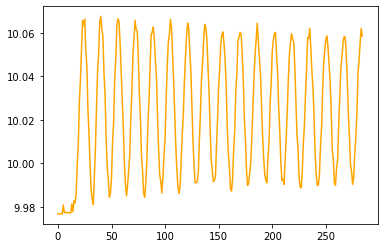

In [44]:
# Plot the acceleration vs array index
array_index=np.arange(0,len(acc_data))
# Use plt.plot(position_m1)
plt.plot(array_index, acc_data, color = 'orange')

Clip your data so that the phase is 0

Text(0.5, 1.0, 'Ultrasound dara for simple haarmonic motion')

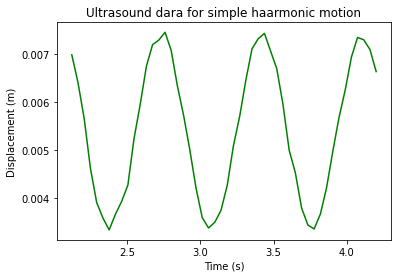

In [46]:
# define your starting time
start_time = 50


# Clip your data
ultrasound_window = ultrasound[start_time:100]

elapsed_time_window = elapsed_time[start_time:100]

# ultrasound_window = ultrasound[start_time:1000]
# elapsed_time_window = elapsed_time[start_time:1000]


# Make a plot
plt.plot(elapsed_time_window,ultrasound_window/1000,color = "green")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Ultrasound dara for simple haarmonic motion')



In [47]:
from scipy.optimize import least_squares

# Make your guess parameters 
guess_amplitude = 0.0075
guess_omega = 4.2
guess_phi = 0
guess_offset = 0.002

# Store all the guessed parameters in an array
guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]



In [48]:
# Perform least squares
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, 
args=(ultrasound_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters = res_lsq['x']

res_lsq = least_squares(get_residuals, guess_parameters, 
                        args=(ultrasound_window,elapsed_time_window))

best_parameters = res_lsq['x']

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))


Best Amplitude: -0.4389188905070748
Best Omega: 4.819039107981789
Best offset: 5.492442520400223
Best Phi: -3.3195564758411313


In [49]:
# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))



Best Amplitude: -0.4389188905070748
Best Omega: 4.819039107981789
Best offset: 5.492442520400223
Best Phi: -3.3195564758411313


Best Amplitude: -0.4389188905070748
Best Omega: 4.819039107981789
Best offset: 5.492442520400223
Best Phi: -3.3195564758411313


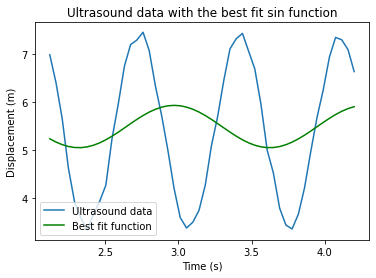

In [52]:
# The best fit sin function will have the best_parameters as an input to the sin function that we created
fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)

# Plot the original data and the best fit function on the same plot
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")
plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Ultrasound data with the best fit sin function")

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

